## Develop branch. 
### Тестирование мультипроцессорности

In [1]:
from src import HybridMetaheuristic


baboon = HybridMetaheuristic("pic/boat.png", "pic/flower.png")

/home/evgeny/Documents/vkr/src/utilities.py:108: RuntimeWarning: divide by zero encountered in log
  items.append(i * np.log(i))
/home/evgeny/Documents/vkr/src/utilities.py:108: RuntimeWarning: invalid value encountered in scalar multiply
  items.append(i * np.log(i))


In [2]:
# Запускаю алгоритм гибридной метаэвристики
baboon.evolution()

  0%|                                                                                                                                                                                                       | 0/100 [00:00<?, ?it/s]

Best score: 2.463956719965373


  1%|█▉                                                                                                                                                                                          | 1/100 [01:52<3:04:58, 112.11s/it]

Best score: 2.4616415630095694


 11%|████████████████████▌                                                                                                                                                                      | 11/100 [23:41<2:50:40, 115.07s/it]

Best score: 2.45940443323662


 17%|███████████████████████████████▉                                                                                                                                                            | 17/100 [31:02<1:53:06, 81.76s/it]

Best score: 2.4588706240289344


 19%|███████████████████████████████████▋                                                                                                                                                        | 19/100 [33:34<1:45:38, 78.25s/it]

Best score: 2.458175870956007


 23%|███████████████████████████████████████████▏                                                                                                                                                | 23/100 [38:33<1:38:23, 76.66s/it]

Best score: 2.4579466824369876


 24%|█████████████████████████████████████████████                                                                                                                                               | 24/100 [39:52<1:38:07, 77.47s/it]

Best score: 2.4567291998103027


 28%|████████████████████████████████████████████████████▋                                                                                                                                       | 28/100 [46:48<1:47:27, 89.55s/it]

Best score: 2.455769581005212


 29%|██████████████████████████████████████████████████████▌                                                                                                                                     | 29/100 [48:30<1:50:28, 93.36s/it]

Best score: 2.4553318799386323


 30%|████████████████████████████████████████████████████████▍                                                                                                                                   | 30/100 [49:31<1:37:21, 83.45s/it]

Best score: 2.455144001639545


 32%|████████████████████████████████████████████████████████████▏                                                                                                                               | 32/100 [51:59<1:28:51, 78.40s/it]

Best score: 2.454626092894096


 41%|████████████████████████████████████████████████████████████████████████████▎                                                                                                             | 41/100 [1:04:14<1:22:51, 84.27s/it]

Best score: 2.4543018712596707


 42%|██████████████████████████████████████████████████████████████████████████████                                                                                                            | 42/100 [1:05:34<1:20:19, 83.09s/it]

Best score: 2.4531331677726778


 52%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                          | 52/100 [1:18:00<58:07, 72.65s/it]

Best score: 2.4527448396826097


 68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                            | 68/100 [1:38:19<39:27, 73.98s/it]

Best score: 2.452419912303486


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [2:20:46<00:00, 84.46s/it]


In [3]:
# Лучший параметр Светлячка
baboon.best_firefly_value

10.763555397180188

In [4]:
from src import Watermark

# Пробую погрузить ЦВЗ с полученными параметрами
watermark = Watermark(
    baboon.best_candidate_indexes, 
    baboon.embedded_image_bin, 
    baboon.image_matrix, 
    baboon.best_firefly_value
)

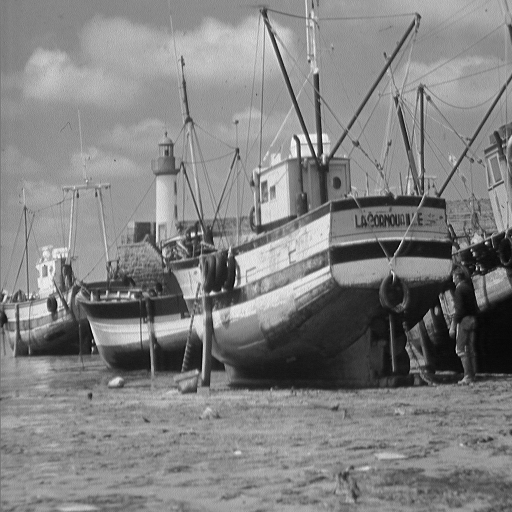

In [5]:
# Исходное изображение без ЦВЗ
baboon.image

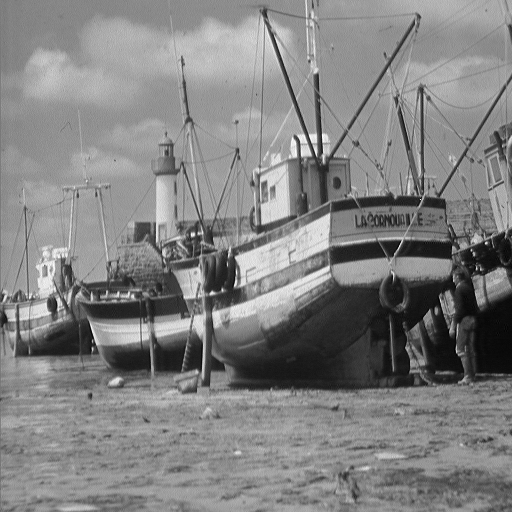

In [6]:
# Полученное изображение с ЦВЗ
watermark.watermark

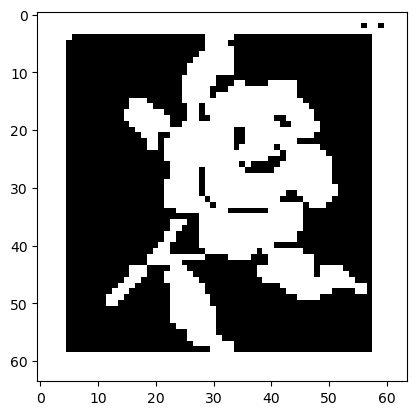

In [7]:
import matplotlib.pyplot as plt

plt.imshow(watermark.extracted_image_bin, cmap=plt.cm.gray)

In [8]:
from src import Attack, Utilities

attacked = Attack(watermark.watermark)

In [9]:
# медианный фильтр

mf = Utilities.extracting(Utilities.matrix_to_image(attacked.mf), watermark.secret_key)
Utilities.get_normal_correlation(mf, watermark.embedded_image_bin)

0.5

In [10]:
# фильтр Гаусса

gs3 = Utilities.extracting(Utilities.matrix_to_image(attacked.gs3), watermark.secret_key)
Utilities.get_normal_correlation(gs3, watermark.embedded_image_bin)

0.9995333644423705

In [11]:
# фильтр Гаусса, kernel=5

gs5 = Utilities.extracting(Utilities.matrix_to_image(attacked.gs5), watermark.secret_key)
Utilities.get_normal_correlation(gs5, watermark.embedded_image_bin)

0.9995333644423705

In [12]:
# усредненная фильтрация, kernel=3

avr = Utilities.extracting(Utilities.matrix_to_image(attacked.avr), watermark.secret_key)
Utilities.get_normal_correlation(avr, watermark.embedded_image_bin)

0.4384309831181728

In [13]:
# Фильтр увеличивает контраст соседних пикселей

shr = Utilities.extracting(Utilities.matrix_to_image(attacked.shr), watermark.secret_key)
Utilities.get_normal_correlation(shr, watermark.embedded_image_bin)

1.0

In [14]:
# Изменение контрастности изображения с использованием гистограмм

his = Utilities.extracting(Utilities.matrix_to_image(attacked.his), watermark.secret_key)
Utilities.get_normal_correlation(his, watermark.embedded_image_bin)

0.9550827423167849

In [15]:
# Искажения яркости пикселей с параметром gamma=0.2

gc2 = Utilities.extracting(Utilities.matrix_to_image(attacked.gc2), watermark.secret_key)
Utilities.get_normal_correlation(gc2, watermark.embedded_image_bin)

0.8946404031149794

In [16]:
# Искажения яркости пикселей с параметром gamma=0.4

gc4 = Utilities.extracting(Utilities.matrix_to_image(attacked.gc4), watermark.secret_key)
Utilities.get_normal_correlation(gc4, watermark.embedded_image_bin)

0.9823809523809524

In [17]:
# Гауссовый шум с параметром 0,001

gn1 = Utilities.extracting(Utilities.matrix_to_image(attacked.gn1), watermark.secret_key)
Utilities.get_normal_correlation(gn1, watermark.embedded_image_bin)

1.0

In [18]:
# Гауссовый шум с параметром 0,005

gn5 = Utilities.extracting(Utilities.matrix_to_image(attacked.gn5), watermark.secret_key)
Utilities.get_normal_correlation(gn5, watermark.embedded_image_bin)

0.9967365967365968

In [19]:
# Гауссовый шум с параметром 0,009

gn9 = Utilities.extracting(Utilities.matrix_to_image(attacked.gn9), watermark.secret_key)
Utilities.get_normal_correlation(gn9, watermark.embedded_image_bin)

0.9934913993491399

In [20]:
# Атака соль/перец с параметром p=0.01

sp1 = Utilities.extracting(Utilities.matrix_to_image(attacked.sp1), watermark.secret_key)
Utilities.get_normal_correlation(sp1, watermark.embedded_image_bin)

0.8383791336748952

In [21]:
# Атака соль/перец с параметром p=0.02

sp2 = Utilities.extracting(Utilities.matrix_to_image(attacked.sp2), watermark.secret_key)
Utilities.get_normal_correlation(sp2, watermark.embedded_image_bin)

0.7661252900232018

In [22]:
# Атака соль/перец с параметром p=0.03

sp3 = Utilities.extracting(Utilities.matrix_to_image(attacked.sp3), watermark.secret_key)
Utilities.get_normal_correlation(sp3, watermark.embedded_image_bin)

0.7060276679841897

In [23]:
# В заданной области затемняет 1/4 пикселей, с параметром center

crp_ct = Utilities.extracting(Utilities.matrix_to_image(attacked.crp_ct), watermark.secret_key)
Utilities.get_normal_correlation(crp_ct, watermark.embedded_image_bin)

0.791281861839675

In [24]:
# В заданной области затемняет 1/4 пикселей, с параметром top-left

crp_tl = Utilities.extracting(Utilities.matrix_to_image(attacked.crp_tl), watermark.secret_key)
Utilities.get_normal_correlation(crp_tl, watermark.embedded_image_bin)

0.8951107396573339

In [25]:
# В заданной области затемняет 1/4 пикселей, с параметром bottom-right

crp_br = Utilities.extracting(Utilities.matrix_to_image(attacked.crp_br), watermark.secret_key)
Utilities.get_normal_correlation(crp_br, watermark.embedded_image_bin)

0.8061723748588634

In [26]:
# Растягивает изображения и возвращает к изначальным размерам 

scl_1024 = Utilities.extracting(Utilities.matrix_to_image(attacked.scl_1024), watermark.secret_key)
Utilities.get_normal_correlation(scl_1024, watermark.embedded_image_bin)

0.9468390804597702

In [27]:
# Сжимает изображения и возвращает к изначальным размерам 

scl_256 = Utilities.extracting(Utilities.matrix_to_image(attacked.scl_256), watermark.secret_key)
Utilities.get_normal_correlation(scl_256, watermark.embedded_image_bin)

0.5458536585365854

In [28]:
# Вращает изображение против часовой стрелки на заданный угол, 5 градусов

rt5 = Utilities.extracting(Utilities.matrix_to_image(attacked.rt5), watermark.secret_key)
Utilities.get_normal_correlation(rt5, watermark.embedded_image_bin)

0.5402193784277879

In [29]:
# Вращает изображение против часовой стрелки на заданный угол, 45 градусов

rt45 = Utilities.extracting(Utilities.matrix_to_image(attacked.rt45), watermark.secret_key)
Utilities.get_normal_correlation(rt45, watermark.embedded_image_bin)

0.5366891173342786

In [30]:
# Вращает изображение против часовой стрелки на заданный угол, 90 градусов

rt90 = Utilities.extracting(Utilities.matrix_to_image(attacked.rt90), watermark.secret_key)
Utilities.get_normal_correlation(rt90, watermark.embedded_image_bin)

0.5409113179813817

In [31]:
# Применяет сжатие JPEG с заданным параметром качества, с параметром 70

com70 = Utilities.extracting(Utilities.matrix_to_image(attacked.com70), watermark.secret_key)
Utilities.get_normal_correlation(com70, watermark.embedded_image_bin)

1.0

In [32]:
# Применяет сжатие JPEG с заданным параметром качества, с параметром 80

com80 = Utilities.extracting(Utilities.matrix_to_image(attacked.com80), watermark.secret_key)
Utilities.get_normal_correlation(com80, watermark.embedded_image_bin)

1.0

In [33]:
# Применяет сжатие JPEG с заданным параметром качества, с параметром 90

com90 = Utilities.extracting(Utilities.matrix_to_image(attacked.com90), watermark.secret_key)
Utilities.get_normal_correlation(com90, watermark.embedded_image_bin)

1.0